In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr 
from datetime import datetime
import yfinance as yfin

In [10]:
end=datetime.now()
start=datetime(2017,1,1)

In [12]:
yfin.pdr_override()
df=pdr.get_data_yahoo('AAPL',start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [15]:
df.reset_index(inplace=True)

In [18]:
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,27.023706,115127600
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,26.993458,84472400
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.130732,88774400


In [19]:
df.set_index('Date',drop=True,inplace=True)

In [20]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.023706,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.993458,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.130732,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.433189,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.684469,134247600


In [21]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: xlabel='Date'>

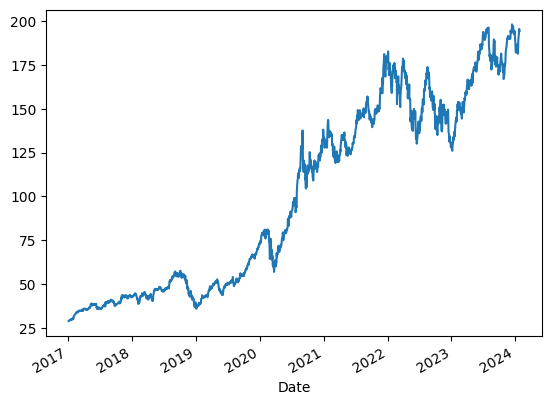

In [22]:
df['Open'].plot()

In [30]:
t=int(0.7*len(df))

In [38]:
dd=df['Open']

In [42]:
train=np.array(dd[:t])
test=np.array(dd[t:])

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train=scaler.fit_transform(train.reshape(-1,1))
test=scaler.transform(test.reshape(-1,1))

In [44]:
def create_dataset(dataset):
    time_step=100
    x=[]
    y=[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        x.append(a)
        b=dataset[i+time_step,0]
        y.append(b)
    return np.array(x),np.array(y)    

In [75]:
x_train,y_train=create_dataset(train)
x_test,y_test=create_dataset(test)

In [76]:
x_train.shape[0]

1143

In [53]:
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import Sequential

In [95]:
model=Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(60,return_sequences=True))
model.add(LSTM(40))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [96]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 60)           14880     
                                                                 
 lstm_7 (LSTM)               (None, 100, 60)           29040     
                                                                 
 lstm_8 (LSTM)               (None, 40)                16160     
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 60121 (234.85 KB)
Trainable params: 60121 (234.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],1))
x_test=x_test.reshape((x_test.shape[0],x_train.shape[1],1))

In [86]:
x_train.shape

(1143, 100, 1)

In [98]:
model.fit(x_train,y_train,batch_size=64,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
18/18 [==============================] - 5s 276ms/step - loss: 0.0024 - val_loss: 0.0056
Epoch 2/100
18/18 [==============================] - 3s 159ms/step - loss: 0.0024 - val_loss: 0.0054
Epoch 3/100
18/18 [==============================] - 3s 150ms/step - loss: 0.0025 - val_loss: 0.0059
Epoch 4/100
18/18 [==============================] - 3s 156ms/step - loss: 0.0023 - val_loss: 0.0087
Epoch 5/100
18/18 [==============================] - 3s 149ms/step - loss: 0.0025 - val_loss: 0.0059
Epoch 6/100
18/18 [==============================] - 3s 151ms/step - loss: 0.0023 - val_loss: 0.0054
Epoch 7/100
18/18 [==============================] - 3s 145ms/step - loss: 0.0025 - val_loss: 0.0057
Epoch 8/100
18/18 [==============================] - 3s 148ms/step - loss: 0.0023 - val_loss: 0.0060
Epoch 9/100
18/18 [==============================] - 3s 148ms/step - loss: 0.0021 - val_loss: 0.0080
Epoch 10/100
18/18 [==============================] - 3s 145ms/step - loss: 0.0022 - val_lo

In [495]:
x_train.shape

(1143, 100, 1)

In [250]:
model_train_pred=model.predict(x_train)
model_test_pred=model.predict(x_test)

14/14 [==============================] - 0s 20ms/step


In [320]:
model_train_pred=scaler.inverse_transform(model_train_pred)
model_test_pred=scaler.inverse_transform(model_test_pred)

In [321]:
from sklearn.metrics import mean_squared_error
import math
print(math.sqrt(mean_squared_error(y_train,model_train_pred)))
math.sqrt(mean_squared_error(y_test,model_test_pred))

84.98061886903893


159.92877010388784

In [280]:
scaler.inverse_transform(model_train_pred)

array([[ 38.223415],
       [ 38.220276],
       [ 38.149445],
       ...,
       [161.34383 ],
       [162.60918 ],
       [166.01802 ]], dtype=float32)

In [322]:
dt=np.array(dd)

In [323]:
dt=dt.reshape((-1,1))

In [353]:
train_predicplot=np.empty_like(dt)
# train_predicplot[:,:]=np.nan()
train_predicplot

array([[1.30196760e-311],
       [1.30196786e-311],
       [1.30196781e-311],
       ...,
       [1.30198056e-311],
       [0.00000000e+000],
       [0.00000000e+000]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


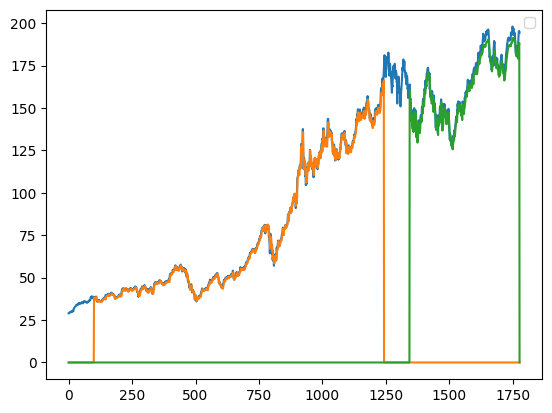

In [363]:
look_back=100
np.random.seed(123)
train_predicplot=np.empty_like(dt)
# train_predicplot[:,:]=np.nan()
train_predicplot[look_back:len(model_train_pred)+look_back,:]=model_train_pred
test_predicplot=np.empty_like(dt)
# test_predicplot=np.nan()
test_predicplot[len(model_train_pred)+2*look_back+1:len(dt)-1,:]=model_test_pred
plt.plot(dt)
plt.plot(train_predicplot)
plt.plot(test_predicplot)
plt.legend()

In [373]:
temp_input=test[434:]

In [ ]:
x_

In [472]:
x_input=np.array(temp_input[:])
x_input=x_input.reshape((1,100,1))
yhat=model.predict(x_input)
yhat[0]

1/1 [==============================] - 0s 25ms/step


array([2.9364476], dtype=float32)

In [477]:
def predictfornext(days=30):
    x_input=test[434:].reshape(1,-1)
    x_input=x_input
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    time_step=100
    i=0
    output=[]
    while(i<days):
        if(len(temp_input)>100):
            x_input=np.array(temp_input[1:])
            x_input=x_input.reshape((1,100,1))
            yhat=model.predict(x_input)
            
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            output.append(yhat[0].tolist())
            i+=1
        else:
            x_input=x_input.reshape((1,100,1))
            yhat=model.predict(x_input)
            temp_input.extend(yhat[0].tolist())
            output.append(yhat[0].tolist())
            i+=1     
    return output        


In [478]:
pred=predictfornext(30)

1/1 [==============================] - 0s 21ms/step


In [479]:
pred

[[2.9364476203918457],
 [2.885193347930908],
 [2.8431384563446045],
 [2.8097808361053467],
 [2.778799295425415],
 [2.748176097869873],
 [2.717162847518921],
 [2.685529947280884],
 [2.6532440185546875],
 [2.6203196048736572],
 [2.5867652893066406],
 [2.552560806274414],
 [2.517657518386841],
 [2.4819793701171875],
 [2.445430278778076],
 [2.407897472381592],
 [2.3692595958709717],
 [2.329388380050659],
 [2.288156032562256],
 [2.2454376220703125],
 [2.201122999191284],
 [2.155122995376587],
 [2.1073825359344482],
 [2.057893991470337],
 [2.006711959838867],
 [1.953967809677124],
 [1.8998873233795166],
 [1.8448082208633423],
 [1.789203405380249],
 [1.7337092161178589]]

In [492]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [490]:
pred=scaler.inverse_transform(pred)

In [489]:
x_input=test[434:].reshape(1,-1)
x_input=scaler.inverse_transform(x_input)
temp_input=list(x_input)
# temp_input=temp_input[0].tolist()
# temp_input=scaler.inverse_transform(temp_input)
temp_input=temp_input[0].tolist()
temp_input

[188.27999877929688,
 188.39999389648438,
 175.17999267578125,
 178.35000610351562,
 180.07000732421875,
 179.49000549316406,
 176.50999450683594,
 174.0,
 176.47999572753906,
 176.47999572753906,
 177.52000427246094,
 179.25999450683594,
 174.5500030517578,
 174.6699981689453,
 174.1999969482422,
 174.82000732421875,
 172.6199951171875,
 169.33999633789062,
 172.02000427246094,
 171.22000122070312,
 172.25999450683594,
 171.08999633789062,
 173.7899932861328,
 173.8000030517578,
 176.80999755859375,
 178.10000610351562,
 178.1999969482422,
 180.07000732421875,
 181.4199981689453,
 176.75,
 176.64999389648438,
 175.5800018310547,
 176.0399932861328,
 175.30999755859375,
 170.91000366210938,
 173.0500030517578,
 171.8800048828125,
 170.3699951171875,
 166.91000366210938,
 169.02000427246094,
 169.35000610351562,
 171.0,
 175.52000427246094,
 174.24000549316406,
 176.3800048828125,
 179.17999267578125,
 182.35000610351562,
 182.9600067138672,
 183.97000122070312,
 185.82000732421875,
 18

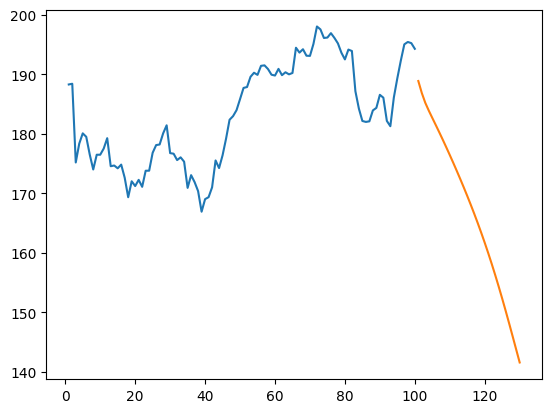

In [493]:
plt.plot(day_new,temp_input)
plt.plot(day_pred,pred)